# Time Series

:::{warning} Under construction

This notebook comprises various text and code snippets for generating plots and other content for the lectures corresponding to this topic.  It is *not* a coherent set of lecture notes.  Students should refer to the actual lecture slides available on Blackboard.

:::

## (notebook preliminaries)

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [31]:
import puffins as pf
from puffins import plotting as pplt

In [3]:
# Make fonts bigger for slides
plt.rcParams['font.size'] = 16

In [4]:
import xarray as xr

# Load the data
filepath_in = "../data/central-park-station-data_1869-01-01_2023-09-30.nc"
ds_cp = xr.open_dataset(filepath_in)

# Clean: drop all 0 values of the temperature fields which are (mostly) spurious
for varname in ["temp_avg", "temp_min", "temp_max"]:
    ds_cp[varname] = ds_cp[varname].where(ds_cp[varname] != 0.)

## Deterministic and random components

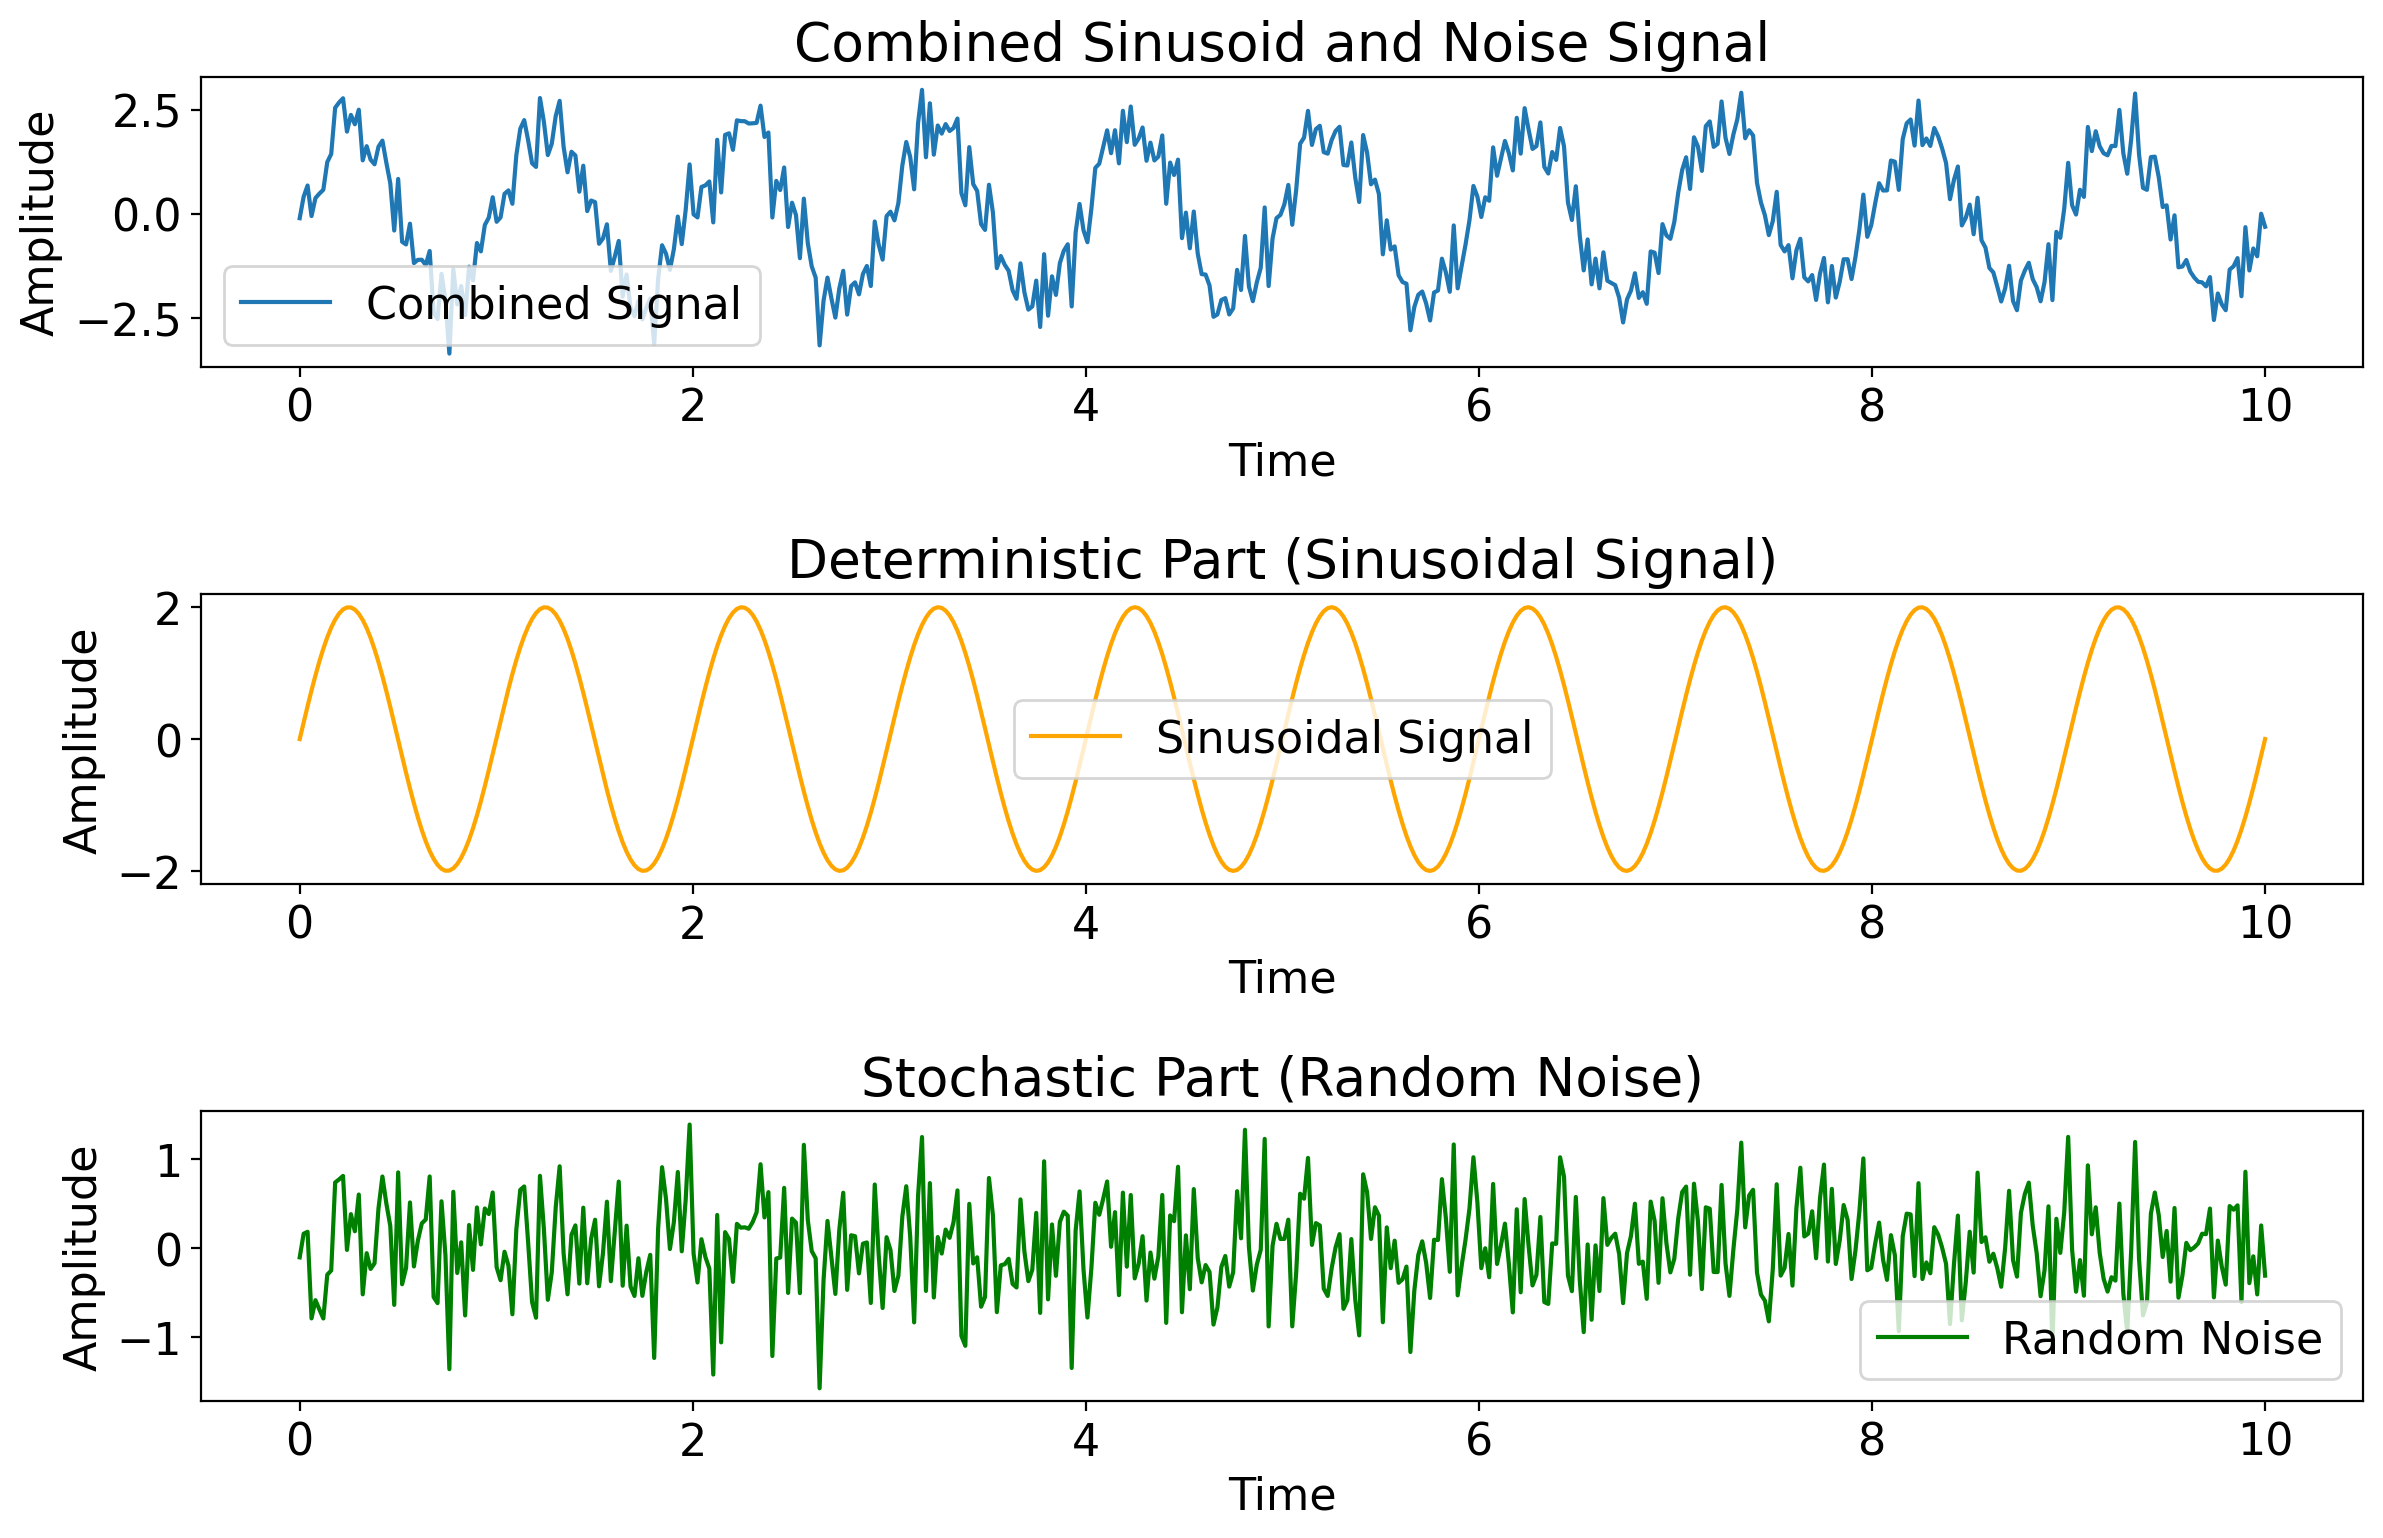

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Time array
t = np.linspace(0, 10, 500)

# Sinusoidal component (deterministic part)
amplitude = 2
frequency = 1
sinusoid = amplitude * np.sin(2 * np.pi * frequency * t)

# Random noise component (stochastic part)
noise_amplitude = 0.5
noise = noise_amplitude * np.random.normal(size=t.shape)

# Combined signal
combined_signal = sinusoid + noise

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(12, 8))

# Combined signal
axs[0].plot(t, combined_signal, label='Combined Signal')
axs[0].set_title('Combined Sinusoid and Noise Signal')
axs[0].legend()

# Sinusoidal part
axs[1].plot(t, sinusoid, label='Sinusoidal Signal', color='orange')
axs[1].set_title('Deterministic Part (Sinusoidal Signal)')
axs[1].legend()

# Random noise part
axs[2].plot(t, noise, label='Random Noise', color='green')
axs[2].set_title('Stochastic Part (Random Noise)')
axs[2].legend()

# Common labels
for ax in axs:
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

## Stationarity

**Strictly stationary process**: one satisfying

$$p(x_{t_1},x_{t_2},\dots,x_{t_K})=p(x_{t_1+h},x_{t_2+h},\dots,x_{t_K+h})$$

for any timesteps $x_{t_1},x_{t_2},\dots,x_{t_K}$ and any shift $h$.

## Serial dependence

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
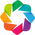

Column
    [0] Row
        [0] FloatSlider(end=0.99, name='Autocorrelation C..., start=-0.99, step=0.01, value=0.5)
    [1] ParamFunction(function, _pane=HoloViews, defer_load=False)

In [6]:
import numpy as np
import holoviews as hv
import panel as pn
from statsmodels.tsa.arima_process import ArmaProcess

hv.extension('bokeh')

# Function to generate an AR(1) process
def generate_ar1_process(phi, size=100):
    # Define AR(1) process with no MA component
    ar = np.array([1, -phi])
    ma = np.array([1])
    AR_object = ArmaProcess(ar, ma)
    return AR_object.generate_sample(nsample=size)

# Create the interactive plot
def interactive_autocorrelation(phi):
    # Generate the time series
    time_series = generate_ar1_process(phi)
    
    # Create the Holoviews plot
    hv_plot = hv.Curve(time_series).opts(width=800, height=400, title=f"AR(1) Time Series with phi={phi}")
    return hv_plot

# Slider for the phi coefficient
phi_slider = pn.widgets.FloatSlider(name='Autocorrelation Coefficient (phi)', start=-0.99, end=0.99, step=0.01, value=0.5)

# Interactive function to update plot based on slider value
@pn.depends(phi=phi_slider)
def update_plot(phi):
    return interactive_autocorrelation(phi)

# Panel layout
pn.Column(
    pn.Row(phi_slider),
    update_plot
).servable()

## Autocovariance and autocorrelation

**Sample autocovariance function**:

$$\hat c(\tau)=\frac{1}{N}\sum_{t=1}^{N-|\tau|}(X_{t+|\tau|}-\hat\mu_{t+|\tau|})(X_t-\hat\mu_t)$$

for $\tau=0,\pm1,\pm2,\dots,\pm(N-1)$, where $\hat\mu_t$ is the estimated deterministic component.

**Sample autocorrelation function**:

$$\hat\rho_\tau=\frac{\hat c(\tau)}{\hat c(0)},$$

where recall that $\hat c(\tau)$ is the autocovariance function.

## White noise processes

In a **white noise** process, the distribution at each timestep is independent of the distributions at all other timesteps.  In other words, every time step is randomly drawn without any influence from the values of any preceding timesteps; in turn, the value drawn at a given timestep has no influence on that of any subsequent timesteps.

This contrasts with many physical processes, where through e.g. a conservation law the value now depends very much on the value immediately before.

In **stationary white noise**, not only is each timestep independent, but the distribution being drawn from at each timestep is identical across timesteps.  Whereas if the distribution varies across timesteps in any way---but the draw at each timestep remains independent from those of any others---the process is *nonstationary white noise*.

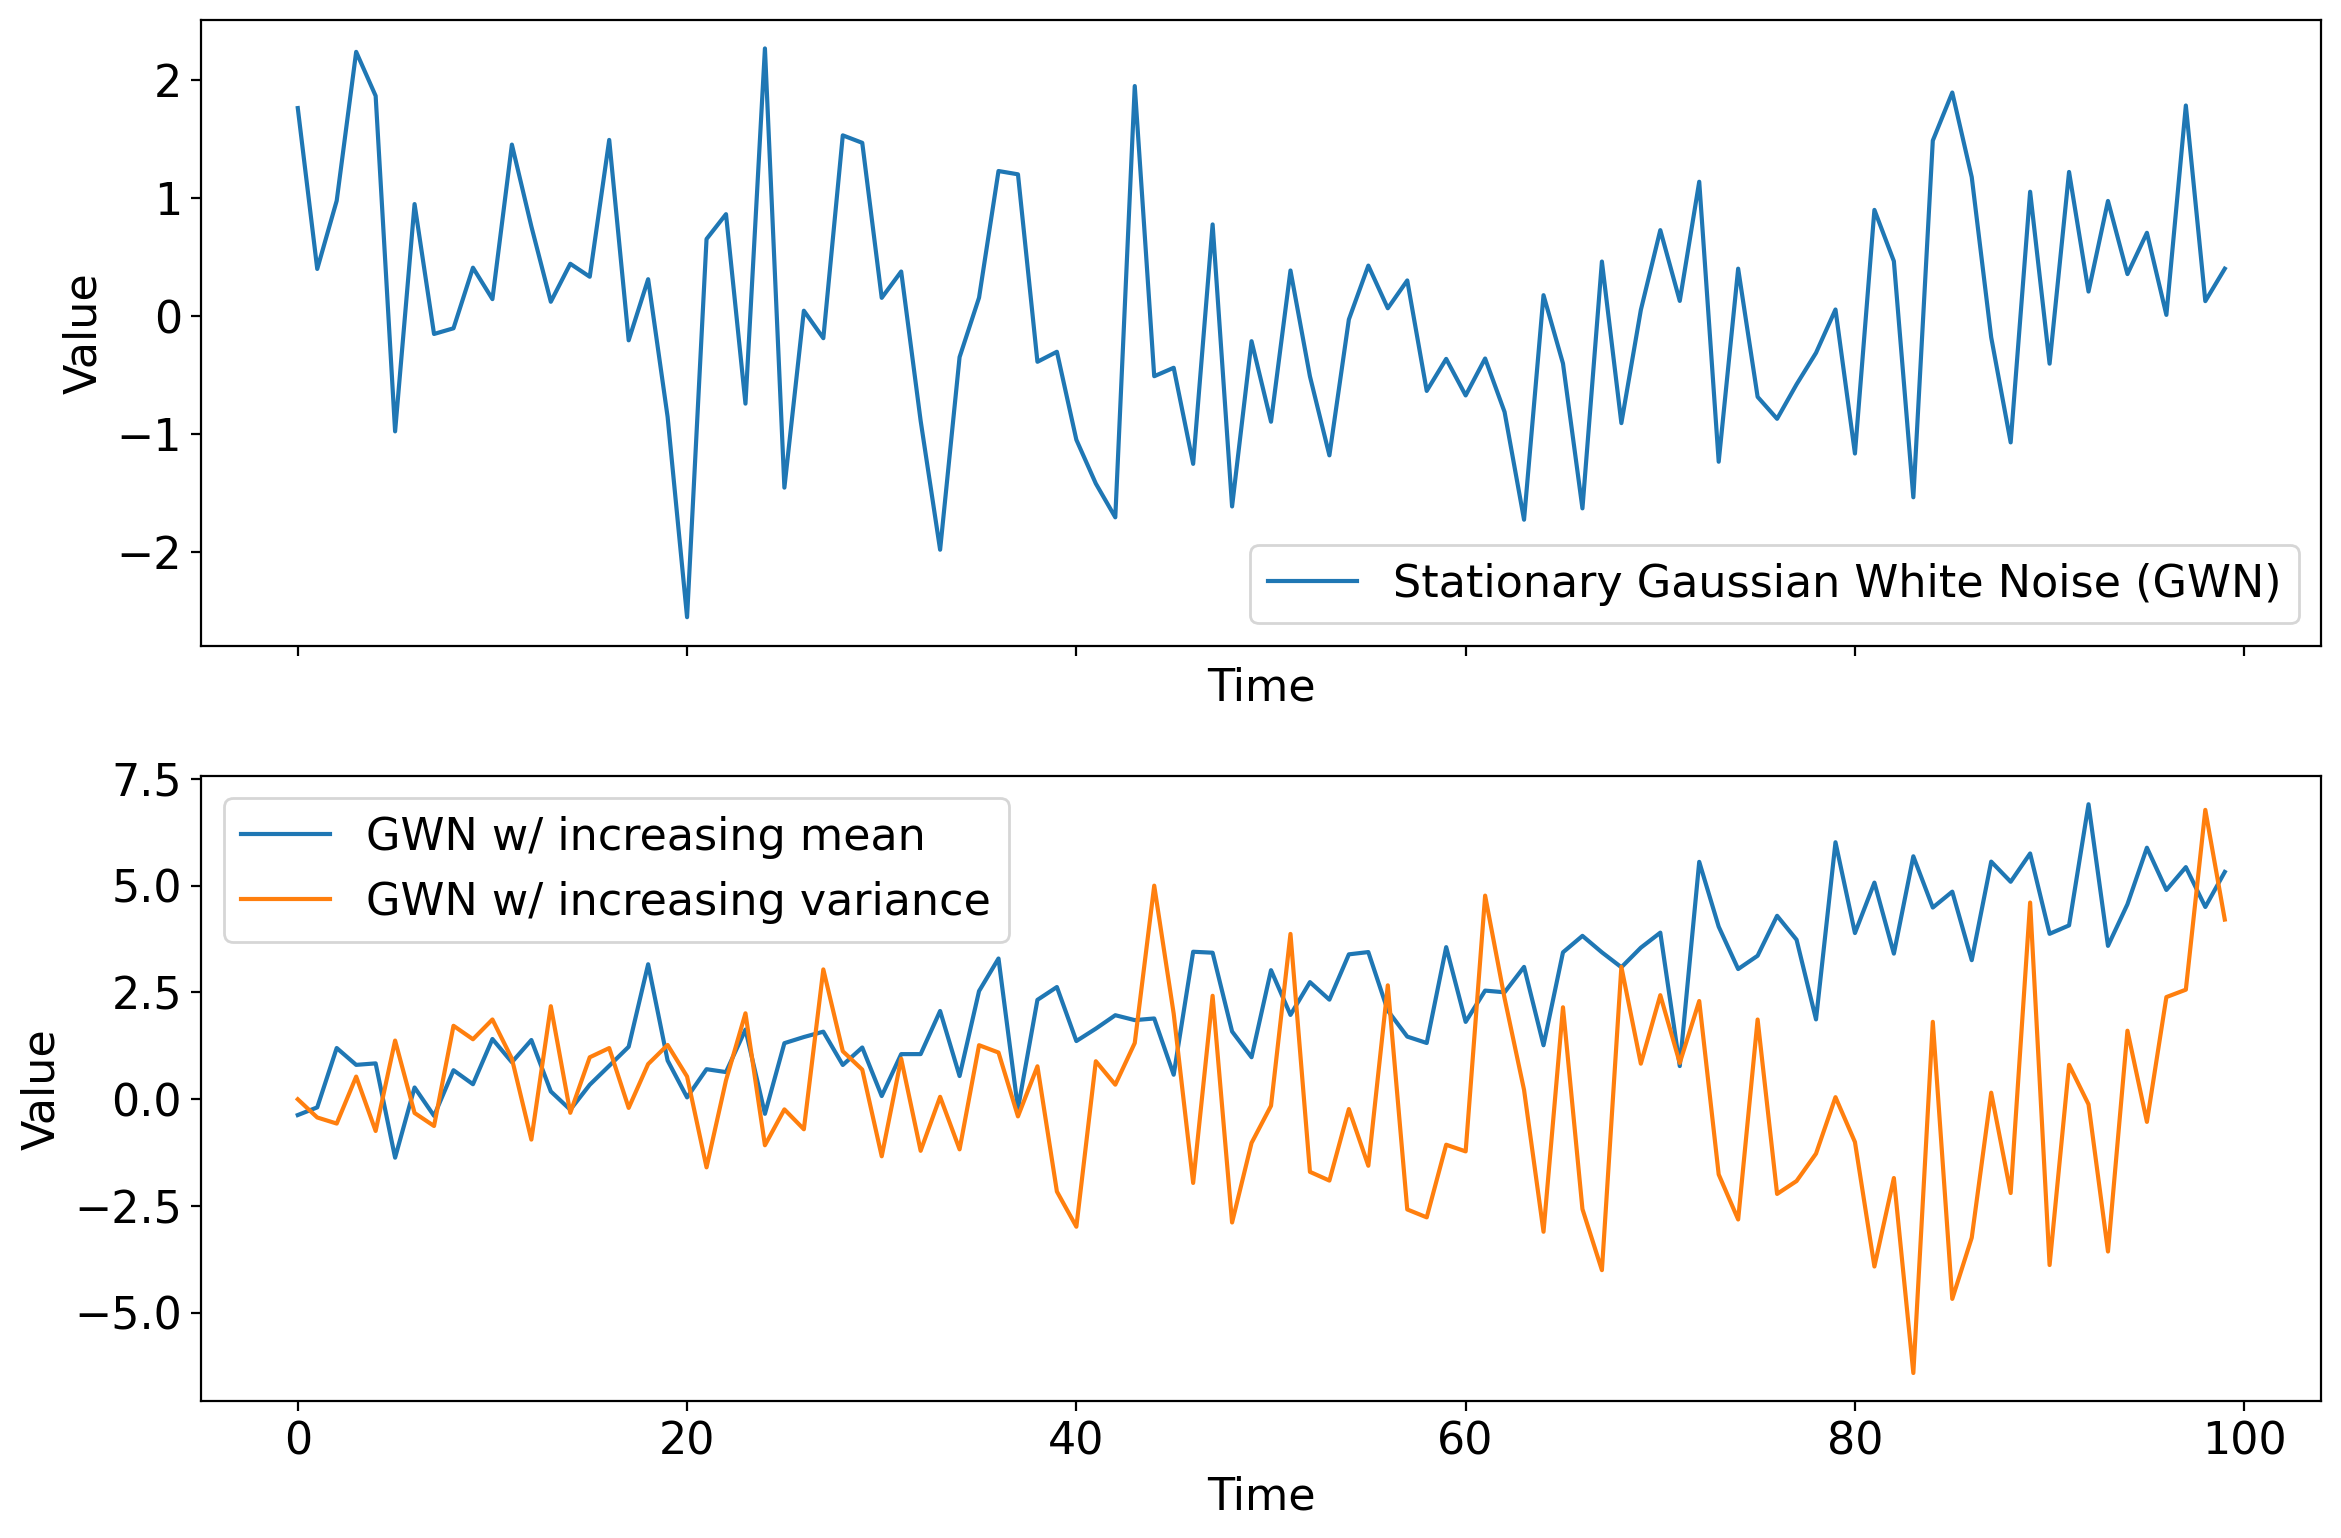

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Generate stationary Gaussian white noise
np.random.seed(0)
stationary_time_series = np.random.normal(loc=0.0, scale=1.0, size=100)

# Generate non-stationary Gaussian white noise with growing variance
time = np.arange(100)
growing_variance = 0.1 * time  # Variance grows over time
ts_inc_var = np.random.normal(loc=0.0, scale=np.sqrt(growing_variance))

# Generate non-stationary Gaussian white noise with growing variance
time = np.arange(100)
growing_mean = 0.05 * time  # Variance grows over time
ts_inc_mean = np.random.normal(loc=growing_mean, scale=1)

# Create the plot
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot the stationary time series
axs[0].plot(stationary_time_series, label='Stationary Gaussian White Noise (GWN)')
axs[0].legend()

# Plot the non-stationary time series
axs[1].plot(ts_inc_mean, label='GWN w/ increasing mean')
axs[1].legend()

axs[1].plot(ts_inc_var, label='GWN w/ increasing variance')
axs[1].legend()

# Set common labels
for ax in axs:
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')

plt.tight_layout()
plt.show()

## Autoregressive models

### AR(1): 1st order autoregressive

$$X_t=\phi X_{t-1}+W_t+k$$

## Power spectra

### Discrete Fourier Transform

$$X_t=\sum_{j=0}^{N/2}\left(A_j\cos(\omega_j t)+B_j\sin(\omega_j t)\right)$$

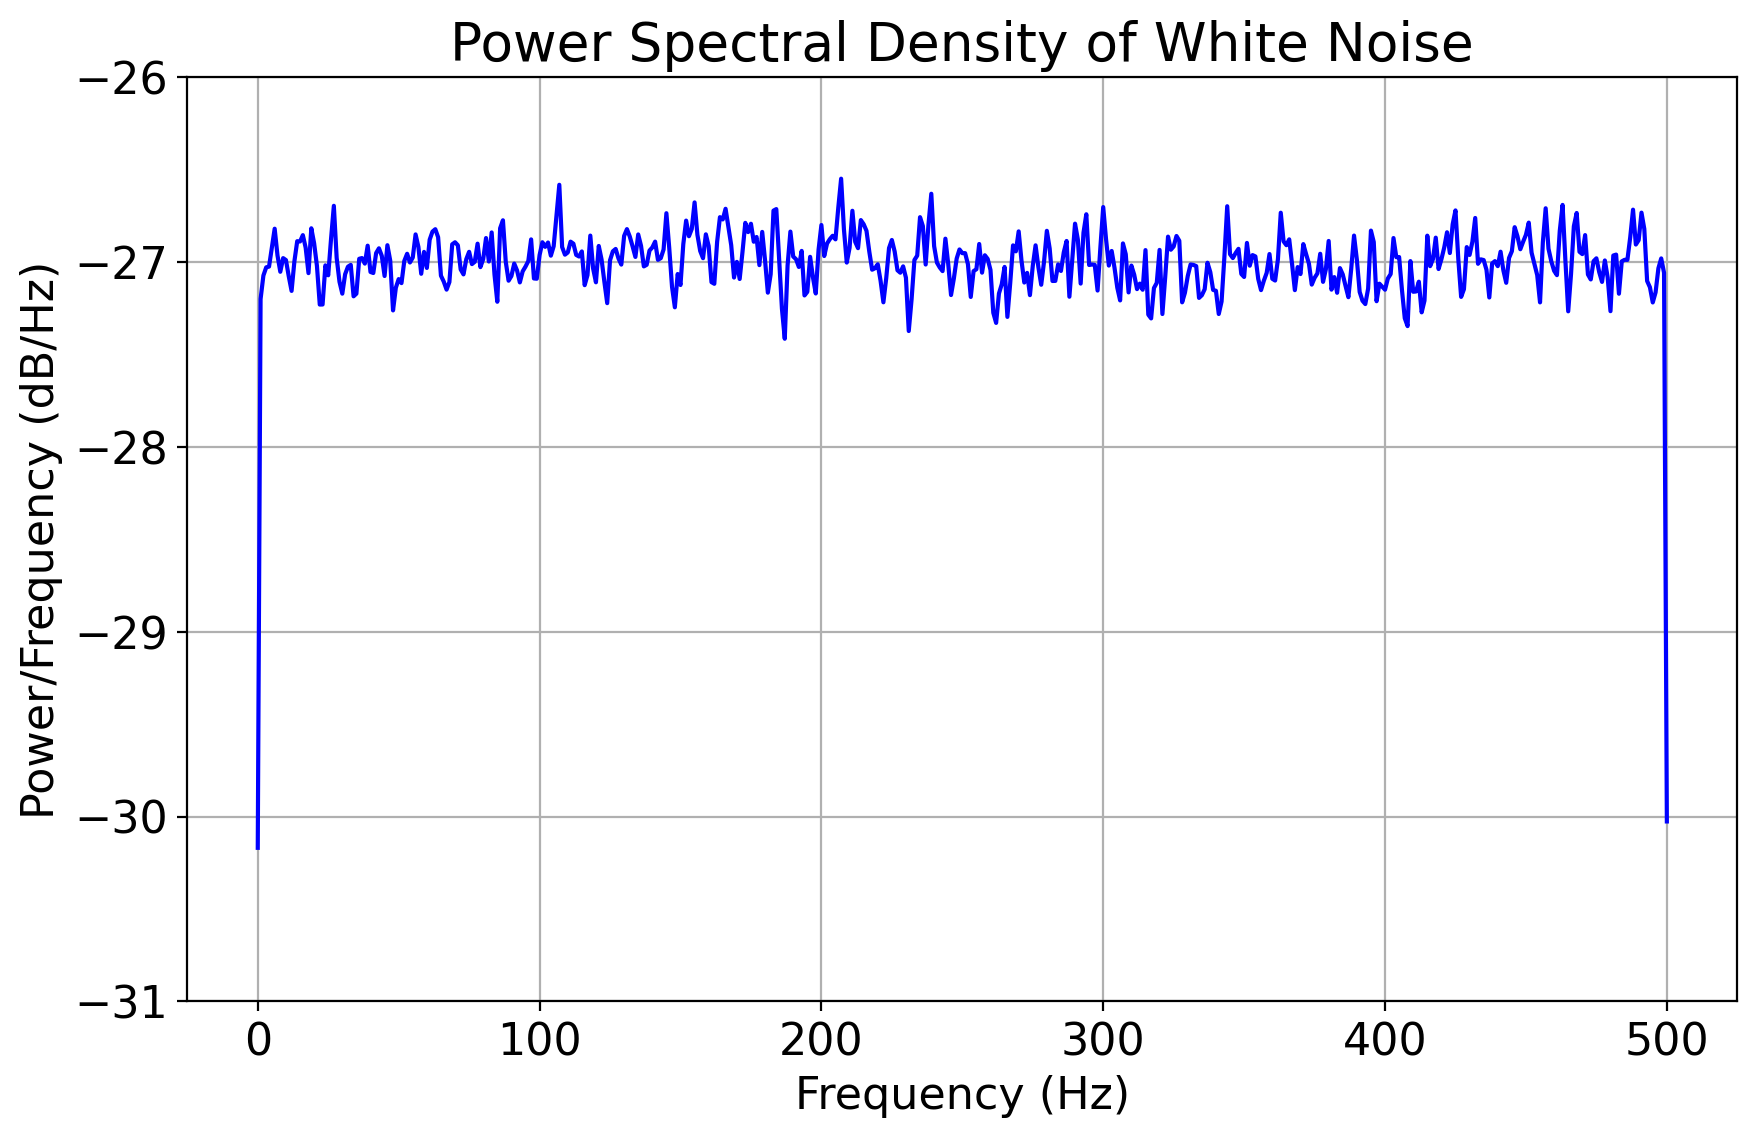

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Generate white noise
np.random.seed(0)
sampling_rate = 1000  # Sampling rate in Hz
duration = 1.0  # Duration in seconds
N = 1000 * int(sampling_rate * duration)  # Total number of samples
white_noise = np.random.normal(0, 1, N)  # Mean 0, standard deviation 1

# Compute and plot the power spectral density
plt.figure(figsize=(10, 6))
plt.psd(white_noise, NFFT=int(N/1000), Fs=sampling_rate, color='blue')

# Formatting the plot
plt.title('Power Spectral Density of White Noise')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.show()

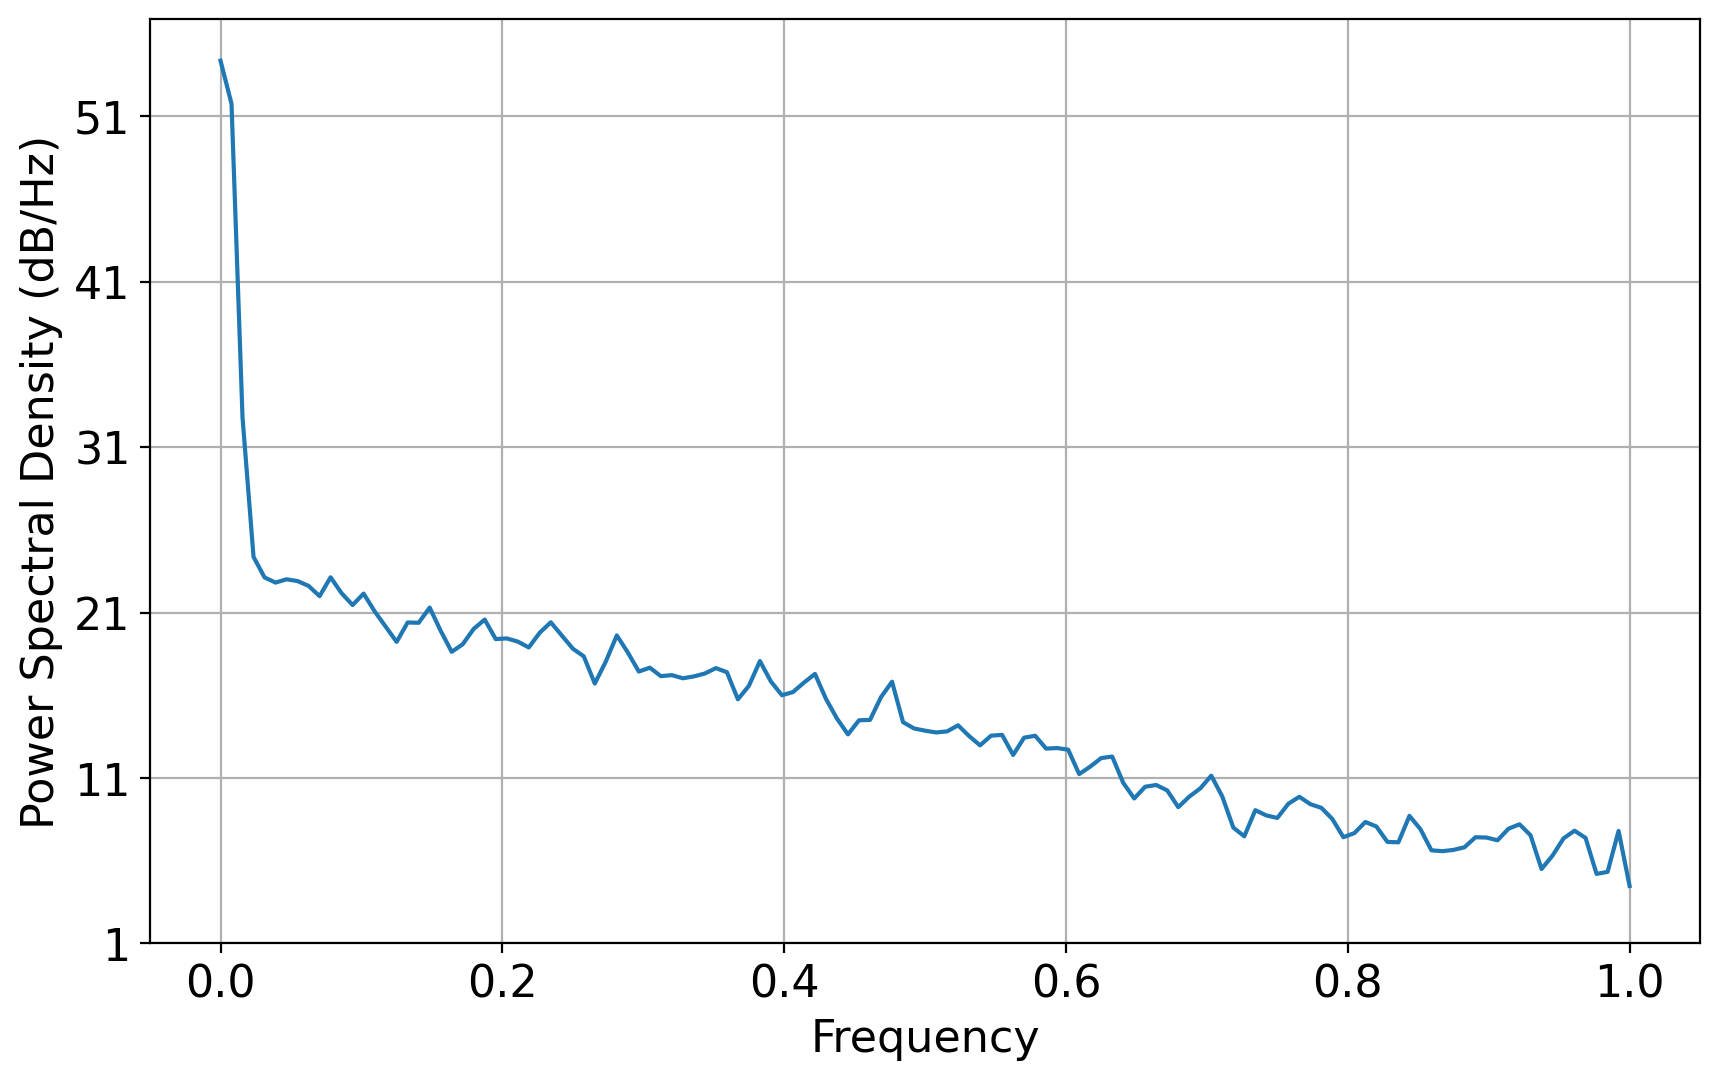

In [26]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.psd(ds_cp["temp_avg"].sel(time=slice("2000", None)))


# Formatting the plot
#plt.xlabel('Frequency (Hz)')
#plt.ylabel('Power/Frequency (dB/Hz)')
plt.show()

(0.001, 1000000.0)

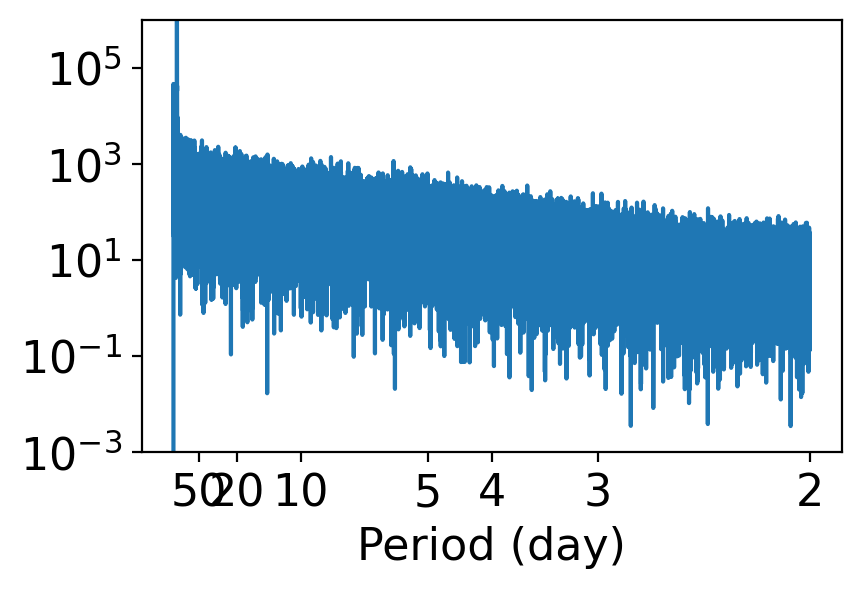

In [47]:
freq, den = scipy.signal.periodogram(ds_cp["temp_avg"].dropna("time"))

fig, ax = pplt.faceted_ax()

ax.semilogy(freq, den)
periods = np.array([2, 3, 4, 5, 10, 20, 50])
ax.set_xlabel("Period (day)")
ax.set_xticks(1 / periods)
ax.set_xticklabels(periods)
ax.set_ylim(1e-3, 1e6)
#ax.set_ylabel("unitless")

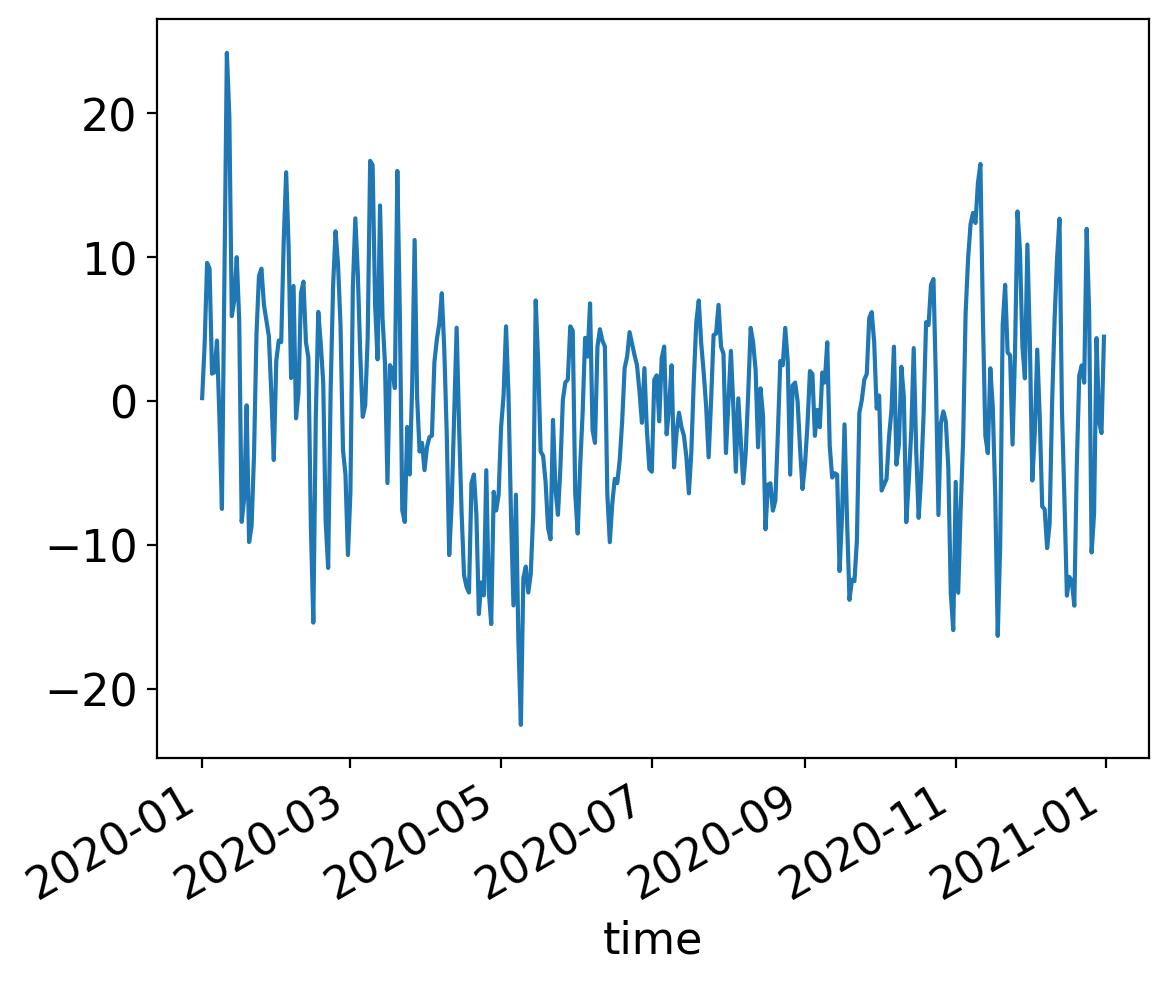

In [52]:
pf.stats.detrend(ds_cp["temp_anom"].dropna("time")).sel(time=slice("2020", "2020")).plot()

(0.001, 1000000.0)

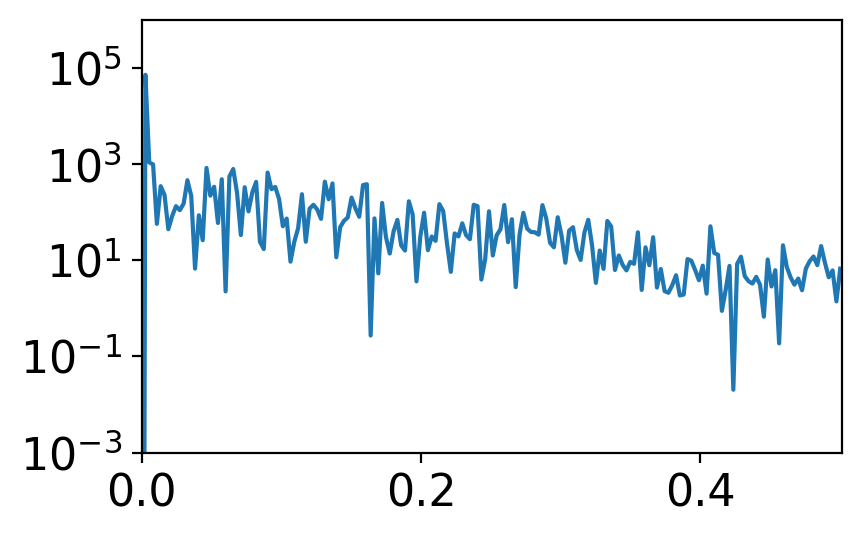

In [59]:
freq, den = scipy.signal.periodogram(pf.stats.detrend(ds_cp["temp_avg"].dropna("time")).sel(time=slice("2020", "2020")))

fig, ax = pplt.faceted_ax()

ax.semilogy(freq, den)
#periods = np.array([2, 3, 4, 5, 10, 20, 50])
ax.set_xlim(0, 0.501)
#ax.set_xlabel("Period (day)")
#ax.set_xticks(1 / periods)
#ax.set_xticklabels(periods)
ax.set_ylim(1e-3, 1e6)
#ax.set_ylabel("unitless")

In [39]:
len(ds_cp["temp_avg"].dropna("time"))

56414

In [40]:
len(freq)

56416